## Importing Header Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

from sklearn.decomposition import PCA




## Reading Data

In [2]:
data=pd.read_csv('C:\\Users\\nehal\\Music\\9.Machine Learning 3\\Take Home\\Day3- Takehome-1\\S3_Takehome\\Risk.csv')
data.head()

,Credit Score,Bank balance,Loan_amaount,Percentage_paid,User_Relibility score,Age,HouseOwner,LoanInterest,Salary,EnquiryResponse,Risk
0,122,90,220,49.7,0.325,31,1,4.5,140,0,1
1,163,72,0,39.0,1.222,33,0,4.4,136,1,1
2,151,60,0,26.1,0.179,22,1,4.2,132,0,0
3,125,96,0,22.5,0.262,21,0,5.9,139,1,0
4,81,72,40,26.6,0.283,24,0,3.4,141,1,0


## Data Types

In [3]:
data.dtypes

Credit Score               int64
Bank balance               int64
Loan_amaount               int64
Percentage_paid          float64
User_Relibility score    float64
Age                        int64
HouseOwner                 int64
LoanInterest             float64
Salary                     int64
EnquiryResponse            int64
Risk                       int64
dtype: object

## Checking For Missing Values

In [4]:
data.isnull().sum()

Credit Score             0
Bank balance             0
Loan_amaount             0
Percentage_paid          0
User_Relibility score    0
Age                      0
HouseOwner               0
LoanInterest             0
Salary                   0
EnquiryResponse          0
Risk                     0
dtype: int64

## Segregating data

In [5]:
x=data.drop('Risk',axis=1)
y=data['Risk']

In [6]:
x.head()

,Credit Score,Bank balance,Loan_amaount,Percentage_paid,User_Relibility score,Age,HouseOwner,LoanInterest,Salary,EnquiryResponse
0,122,90,220,49.7,0.325,31,1,4.5,140,0
1,163,72,0,39.0,1.222,33,0,4.4,136,1
2,151,60,0,26.1,0.179,22,1,4.2,132,0
3,125,96,0,22.5,0.262,21,0,5.9,139,1
4,81,72,40,26.6,0.283,24,0,3.4,141,1


## Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head()

,Credit Score,Bank balance,Loan_amaount,Percentage_paid,User_Relibility score,Age,HouseOwner,LoanInterest,Salary,EnquiryResponse
0,0.028960,1.086656,1.203945,2.244277,-0.448807,-0.184551,0.976741,-0.089519,-0.335666,-0.993550
1,1.310982,0.149197,-0.693449,0.884558,2.255319,-0.013577,-1.023813,-0.208412,-0.863541,1.006492
2,0.935756,-0.475776,-0.693449,-0.754730,-0.888944,-0.953934,0.976741,-0.446198,-1.391416,-0.993550
3,0.122767,1.399142,-0.693449,-1.212206,-0.638729,-1.039421,-1.023813,1.574982,-0.467635,1.006492
4,-1.253061,0.149197,-0.348469,-0.691192,-0.575422,-0.782960,-1.023813,-1.397342,-0.203698,1.006492


## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y)

## Accuracy Metrics

In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

def train_metrics(model,pred,y_train):
    
    sns.heatmap(confusion_matrix(pred,y_train),annot=True)
    print('Accuracy Score:',accuracy_score(pred,y_train))
    print('roc_auc_score:',roc_auc_score(pred,y_train))
    

def test_metrics(model,pred,y_test):
    
    sns.heatmap(confusion_matrix(pred,y_test),annot=True)
    print('Accuracy Score:',accuracy_score(pred,y_test))
    print('roc_auc_score:',roc_auc_score(pred,y_test))

## Random Forest Model

Accuracy Score: 0.9992156862745099
roc_auc_score: 0.9991392259784975


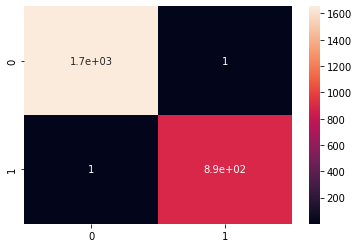

In [10]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=10)
model.fit(x_train,y_train)

pred=model.predict(x_train)
train_metrics(model,pred,y_train)

Accuracy Score: 0.9776470588235294
roc_auc_score: 0.9781575235871998


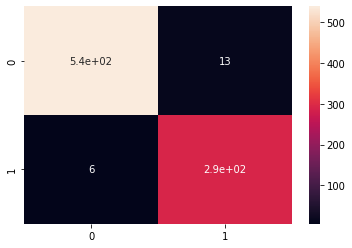

In [11]:
pred=model.predict(x_test)
test_metrics(model,pred,y_test)

# PCA

## Dimensionality Reduction

### Signal to Noise Ratio(SNR)
- In order to determine the strength of a signal it is necessary to calculate what is called the signal-to-noise-ratio (SNR).
- The higher the ratio, the easier it becomes to detect a true signal or extract useful information from the raw signal.
- Thus, it is defined as the ratio as the power (P) of a signal to the power (P) of the background noise.
- The knowledge of this ratio has many important applications in applied mathematics, analytical chemistry, electronics, and the geosciences.
- In electronics, signal and noise are measured in decibels, a measure of volume.
- In other disciplines, the SNR is also known as the effect size.

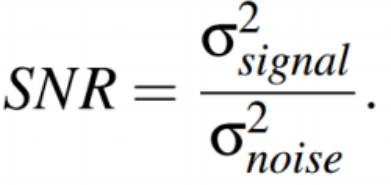

## PCA (Principle Component Analysis)

- In simple words, principal component analysis is a method of extracting important variables (in form of components) from a large set of variables available in a data set.
- It extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible.
- With fewer variables, visualization also becomes much more meaningful.
- PCA is more useful when dealing with 3 or higher dimensional data.


- Therefore,`First principal component` is a linear combination of original predictor variables which captures the maximum variance in the data set.
- It determines the direction of highest variability in the data. Larger the variability captured in first component, larger the information captured by component.
- No other component can have variability higher than first principal component.


- `Second principal component (Z²)` is also a linear combination of original predictors which captures the remaining variance in the data set and is uncorrelated with Z¹. 
- In other words, the correlation between first and second component should is zero.

- **Eigenvectors**:
  - Eigenvectors and Eigenvalues are in itself a big domain, let’s restrict ourselves to the knowledge of the same which we would require here. 
  - So, consider a non-zero vector v. 
  - It is an eigenvector of a square matrix A, if Av is a scalar multiple of v.
  - Or simply: Av = ƛv
  - Here, v is the eigenvector and ƛ is the eigenvalue associated with it.
  
- **Covariance Matrix**: 
  - This matrix consists of the covariances between the pairs of variables.
  - The (i,j)th element is the covariance between i-th and j-th variable.

## PCA: algorithm
 - 1) Subtract mean (Normalize the data)
 - 2) Calculate the covariance matrix
 - 3) Calculate eigenvectors and eigenvalues of the covariance matrix
 - 4) Rank eigenvectors by its corresponding eigenvalues
 - 5) Obtain P with its column vectors corresponding to the top k eigenvectors

In [12]:
from sklearn.decomposition import PCA

#### Covarience Matrix 

In [13]:
cov_Matrix=np.cov(x_train.T)
cov_Matrix

array([[ 9.82599844e-01,  1.53577413e-01,  3.09962054e-01,
         2.16520476e-01,  1.46913535e-01,  2.47084349e-01,
         3.79646644e-02,  1.00009755e-02,  9.34526408e-03,
         7.18078680e-03],
       [ 1.53577413e-01,  1.00898925e+00,  7.51953149e-02,
         2.76713697e-01,  2.76999212e-02,  2.35054746e-01,
        -2.20319072e-03,  3.26065024e-02,  1.50406077e-02,
         1.23714471e-03],
       [ 3.09962054e-01,  7.51953149e-02,  9.48658319e-01,
         1.90952970e-01,  1.88821351e-01, -6.45660624e-02,
         9.60072933e-03,  1.77070038e-03, -7.52536942e-03,
        -5.33400702e-04],
       [ 2.16520476e-01,  2.76713697e-01,  1.90952970e-01,
         1.00682006e+00,  1.39251341e-01,  4.94156171e-02,
        -1.82686429e-03, -5.69162486e-03,  1.00245529e-02,
        -3.04251133e-02],
       [ 1.46913535e-01,  2.76999212e-02,  1.88821351e-01,
         1.39251341e-01,  1.00943551e+00,  3.45298108e-02,
         4.32050451e-02,  1.61786814e-02,  2.27894126e-02,
         2.

#### Eigen Vectors

In [14]:
pca=PCA()
pca.fit(x_train)

print('Eigen Vectors:')
pca.components_

Eigen Vectors:


array([[ 5.15154080e-01,  4.16037381e-01,  3.87672124e-01,
         4.67393705e-01,  3.12678072e-01,  3.00810411e-01,
         4.85728062e-02,  4.07583649e-02,  2.20862631e-02,
         4.44701746e-03],
       [ 4.45027729e-02, -4.44805796e-01,  4.73772743e-01,
         5.13647444e-02,  4.25969385e-01, -5.91722055e-01,
         1.14959702e-01, -1.64367767e-01,  2.24510367e-02,
        -2.73295637e-02],
       [-9.93627021e-02,  1.77344548e-01, -5.09714486e-03,
         2.92632791e-01, -2.38046387e-01, -1.68151741e-01,
        -2.80366939e-01, -5.02423276e-01,  2.07272883e-01,
        -6.43489026e-01],
       [-8.62911974e-02,  4.15093004e-02,  9.58669580e-02,
         1.09807981e-01,  3.45903514e-02, -1.84084924e-01,
        -8.03827170e-01,  3.59552679e-01,  2.91208486e-01,
         2.72543864e-01],
       [ 3.07224882e-02, -8.63986434e-03, -1.18709355e-01,
        -1.04661921e-01,  1.03374379e-01,  1.40921265e-01,
         1.51502265e-01, -4.38133971e-01,  7.58411311e-01,
         3.

#### Eigen Values

In [15]:
print('Eigen Values:')
pca.explained_variance_

Eigen Values:


array([1.77461549, 1.17967765, 1.04152749, 1.01481261, 0.99860596,
       0.97408732, 0.91442479, 0.84717132, 0.67345651, 0.5264176 ])

#### Project on 2D

In [16]:
pca=PCA(n_components=2)
pca.fit(x_train)

PCA(n_components=2)

In [17]:
pca.explained_variance_ratio_

array([0.17844663, 0.1186226 ])

In [18]:
print('Amount of variance explained by 2 components:',pca.explained_variance_ratio_.sum()*100)

Amount of variance explained by 2 components: 29.706923311828042


In [19]:
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.fit_transform(x_test)

c:\users\nehal\anaconda3\envs\ml3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

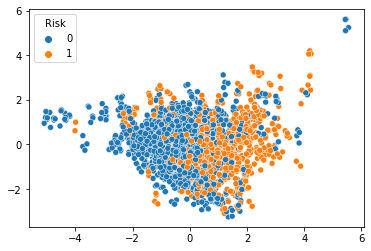

In [20]:
sns.scatterplot(x_train_pca[:,0],x_train_pca[:,1],hue=y_train)

<AxesSubplot:>

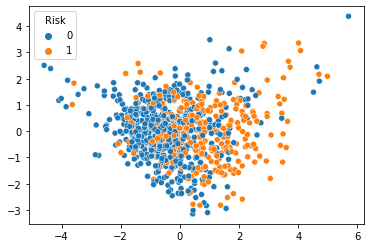

In [21]:
sns.scatterplot(x=x_test_pca[:,0],y=x_test_pca[:,1],hue=y_test)

In [22]:
pca=PCA()
pca.fit(x_train)
np.cumsum(pca.explained_variance_ratio_)*100

array([ 17.84466327,  29.70692331,  40.1800131 ,  50.38447108,
        60.42596296,  70.22090746,  79.41591478,  87.93465422,
        94.70660271, 100.        ])

<BarContainer object of 10 artists>

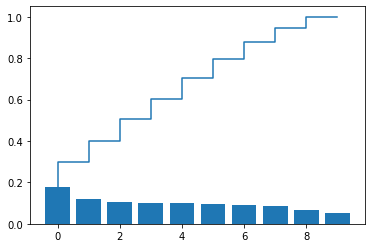

In [28]:
plt.step(range(len(np.cumsum(pca.explained_variance_ratio_))),np.cumsum(pca.explained_variance_ratio_))
plt.bar(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)

## Linear Discriminant analysis

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [25]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)

pred_train=lda.predict(x_train)
pred_test=lda.predict(x_test)



## Kernel PCA 

# MCA

## LDA

## SVD